In [9]:
# Imports

from statsmodels.stats import diagnostic
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_theme()

from utils import calculate_nutripoints

# Load the statistical libraries

In [10]:
# Data Imports

year_grocery = pd.read_csv("data/year_osward_grocery.csv")
display(year_grocery)

wellbeing_data = pd.read_excel(
    "data/london-ward-well-being-probability-scores.xls", sheet_name="Data")
display(wellbeing_data.head())

wellbeing_scores = pd.read_excel(
    "data/london-ward-well-being-probability-scores.xls", sheet_name="Scores", header=[0, 1])
display(wellbeing_scores.head())

wellbeing_final_scores = pd.read_excel(
    "data/london-ward-well-being-probability-scores.xls", sheet_name="Ranked", header=[3], usecols="B:C")
display(wellbeing_final_scores)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,...,37315,14370.0,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905
1,E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,...,14474,10845.0,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706
2,E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,...,32138,13856.0,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271
3,E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,...,16223,10850.0,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,E05011485,347.127333,30.0,150.0,250.0,450.0,1000.0,404.406795,1.640905,104.564209,...,72979,18010.0,8569.0,9441.0,4752.0,11588.0,1670.0,34.588840,2.14,8415.887850
634,E05011486,369.585206,32.5,150.0,280.0,475.0,1000.0,422.180212,1.928714,105.777577,...,51255,17298.0,8182.0,9116.0,4762.0,10841.0,1695.0,34.923633,1.69,10235.502959
635,E05011487,323.975163,30.0,135.0,240.0,400.0,1000.0,391.775528,3.095665,106.126930,...,20568,15592.0,7594.0,7998.0,4160.0,9750.0,1682.0,35.029374,2.62,5951.145038
636,E05011488,380.380242,32.5,150.0,270.0,460.0,1200.0,536.688582,2.967849,106.437623,...,33388,18271.0,8873.0,9398.0,5099.0,11378.0,1794.0,34.147720,1.97,9274.619289


,Old Ward Code,New ward code,Ward,Borough,Life Expectancy 2005-2009,Life Expectancy 2006-2010,Life Expectancy 2007-11,Life Expectancy 2008-12,Life Expectancy 2009-13,Childhood Obesity 2009,...,"Homes with access to open space & nature, and % greenspace - 2009","Homes with access to open space & nature, and % greenspace - 2010","Homes with access to open space & nature, and % greenspace - 2011","Homes with access to open space & nature, and % greenspace - 2012","Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2011/12 and 2012/13","Subjective well-being average score, 2011/12 and 2012/13.1","Subjective well-being average score, 2011/12 and 2012/13.2","Subjective well-being average score, 2011/12 and 2012/13.3","Subjective well-being average score, 2013"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00AA,E09000001,City of London,City of London,84.3294,83.730426,83.704458,84.482365,86.393685,22.22,...,-6.47875,-6.478752,-6.478752,-6.478752,-6.478752,7.64033,7.640332,7.640332,7.640332,7.655963
2,00ABFX,E05000026,Abbey,Barking and Dagenham,82.0761,82.482712,82.132476,81.122613,81.998428,21.7009,...,-0.889538,-0.889538,-0.889538,-0.889538,-0.889538,7.89796,7.897959,7.897959,7.897959,7.789197
3,00ABFY,E05000027,Alibon,Barking and Dagenham,77.8284,78.266936,78.301335,78.145305,78.989687,25.974,...,-1.79097,-1.790968,-1.790968,-1.790968,-1.790968,7.35884,7.358842,7.358842,7.358842,7.553030
4,00ABFZ,E05000028,Becontree,Barking and Dagenham,78.4307,78.914120,78.721642,79.019303,79.229604,22.449,...,-5.46967,-5.469666,-5.469666,-5.469666,-5.469666,7.60912,7.609123,7.609123,7.609123,7.551141


Old Ward Code New ward code       Ward name               Borough  \
  Old Ward Code New ward code       Ward name               Borough   
0          00AA     E09000001  City of London        City of London   
1        00ABFX     E05000026           Abbey  Barking and Dagenham   
2        00ABFY     E05000027          Alibon  Barking and Dagenham   
3        00ABFZ     E05000028       Becontree  Barking and Dagenham   
4        00ABGA     E05000029  Chadwell Heath  Barking and Dagenham   

  Life Expectancy                                              \
             2009       2010       2011       2012       2013   
0         18.7787  14.927723  13.653698  16.026485  23.661861   
1         9.10692   9.583198   6.867900   1.417979   4.251859   
2        -9.12595  -8.474883  -9.670047 -11.527627  -9.035117   
3        -6.54069  -5.702701  -7.855704  -7.727404  -7.975613   
4       -0.285993  -2.129908  -0.888760  -3.151067  -1.211477   

  Childhood Obesity  ...  \
               2009  ...   
0          -7.17432  ...   
1          -6.11698  ...   
2          -14.8205  ...   
3           -7.6407  ...   
4          -10.3826  ...   

  Homes with access to open space & nature, and % greenspace            \
                                                        2009      2010   
0                                           -9.52981         -9.529812   
1                                           -1.30845         -1.308451   
2                                           -2.63439         -2.634394   
3                                           -8.04551         -8.045513   
4                                            2.90909          2.909091   

                                Subjective well-being average score  \
       2011      2012      2013                                2009   
0 -9.529812 -9.529812 -9.529812                                   0   
1 -1.308451 -1.308451 -1.308451                             8.09781   
2 -2.634394 -2.634394 -2.634394                            -8.84788   
3 -8.045513 -8.045513 -8.045513                           -0.980979   
4  2.909091  2.909091  2.909091                             -16.729   

                                              
        2010       2011       2012      2013  
0   0.000000   0.000000   0.000000  0.000000  
1   8.097813   8.097813   8.097813  6.118185  
2  -8.847876  -8.847876  -8.847876 -4.726708  
3  -0.980979  -0.980979  -0.980979 -4.813479  
4 -16.729023 -16.729023 -16.729023 -4.813479  

[5 rows x 64 columns]

,Index Score 2013,Ward
0,17.217884,Knightsbridge and Belgravia
1,13.741583,Campden
2,11.572839,West Wickham
3,11.566019,South Twickenham
4,11.435223,East Sheen
...,...,...
620,-12.825333,Upper Edmonton
621,-12.889626,Northumberland Park
622,-13.472226,Harlesden
623,-13.817601,Fieldway


In [11]:
# year_grocery=year_grocery.sort_values(by='representativeness_norm', ascending=False, ignore_index=True)
year_grocery = year_grocery.nlargest(
    int(0.8*len(year_grocery)), 'representativeness_norm')

In [12]:
#nutripoints=['nutri_energy','nutri_sugar', 'nutri_saturate', 'nutri_sodium', 'nutri_fibre', 'nutri_protein', 'nutri_fruit_veg']
year_grocery["nutripoints"]=year_grocery.apply(calculate_nutripoints, axis=1)
year_grocery["nutripoints"].describe()

count    510.000000
mean       9.237255
std        1.469929
min        0.500000
25%        8.500000
50%        9.000000
75%       10.000000
max       14.500000
Name: nutripoints, dtype: float64

In [13]:
display(year_grocery)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,nutripoints
570,E05011117,382.039628,40.0,175.0,300.0,500.0,1000.0,363.202381,0.465398,105.990925,...,11911.0,6099.0,5812.0,1558.0,9552.0,801.0,34.867937,1.35,8822.962963,8.5
565,E05011112,398.825948,40.0,180.0,320.0,500.0,1000.0,397.149657,0.492467,107.602664,...,16365.0,8103.0,8262.0,2997.0,12218.0,1150.0,33.235625,1.30,12588.461538,8.0
246,E05000336,397.066289,40.0,180.0,300.0,500.0,1000.0,414.783419,0.608474,122.609742,...,11959.0,5764.0,6195.0,2625.0,7194.0,2140.0,40.250941,3.32,3602.108434,10.0
438,E05000605,416.199096,40.5,182.0,325.0,500.0,1200.0,506.239533,0.700727,107.997869,...,13599.0,7196.0,6403.0,2630.0,9919.0,1050.0,34.684389,1.31,10380.916031,9.0
162,E05000252,374.792470,40.0,173.7,300.0,500.0,1000.0,354.119901,0.563867,99.371843,...,12013.0,5828.0,6185.0,1709.0,8813.0,1491.0,37.502289,0.89,13497.752809,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,E05000114,337.091446,25.0,130.0,250.0,440.0,1000.0,403.427998,2.829008,101.791816,...,16594.0,7755.0,8839.0,4177.0,9698.0,2719.0,37.793660,13.29,1248.607976,9.5
255,E05000345,331.120657,28.0,135.0,250.0,420.0,1000.0,375.534166,3.745168,108.422901,...,13874.0,6889.0,6985.0,3515.0,8972.0,1387.0,34.132334,4.01,3459.850374,12.5
266,E05000356,351.524568,30.0,150.0,250.0,450.0,1000.0,384.612740,3.651894,115.761322,...,12795.0,6629.0,6166.0,3012.0,8330.0,1453.0,35.510981,2.01,6365.671642,9.0
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362,10.0


In [14]:
wellbeing_scores = wellbeing_scores.loc[:, (slice(
    None), [2013, "New ward code", "Ward name", "Borough"])].dropna(how="all")
wellbeing_scores = wellbeing_scores.droplevel(1, axis=1)
display(wellbeing_scores)

,New ward code,Ward name,Borough,Life Expectancy,Childhood Obesity,Incapacity Benefit rate,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score
0,E09000001,City of London,City of London,23.661861,-19.399351,15.136349,8.610513,17.205862,5.606699,10.348951,11.827561,8.094587,29.202424,-9.529812,0.000000
1,E05000026,Abbey,Barking and Dagenham,4.251859,-8.272848,3.953790,-11.228402,-18.441350,-15.314186,-4.528620,-7.570297,-9.420035,15.818063,-1.308451,6.118185
2,E05000027,Alibon,Barking and Dagenham,-9.035117,-12.944834,-20.398595,-15.084810,-9.218119,-3.905882,-10.941296,-11.507206,-17.164782,-4.501940,-2.634394,-4.726708
3,E05000028,Becontree,Barking and Dagenham,-7.975613,-18.487966,-7.354425,-14.275467,-13.060348,1.890929,-12.819252,-10.803760,-16.413721,-6.460879,-8.045513,-4.813479
4,E05000029,Chadwell Heath,Barking and Dagenham,-1.211477,-19.346426,-11.983294,-10.292302,-6.060588,-31.284887,-6.503490,-14.903977,-12.907861,-10.826177,2.909091,-4.813479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,E09000029,SUTTON,Sutton,5.351062,0.229239,8.451536,4.969422,1.193134,-3.518120,11.980036,2.956890,4.763430,-6.587229,-0.762555,6.579079
655,E09000030,TOWER HAMLETS,Tower Hamlets,-6.477760,-13.266398,-0.606568,-12.021100,-1.357916,-16.814550,0.506199,0.000000,-18.017343,8.906664,0.111718,14.366305
656,E09000031,WALTHAM FOREST,Waltham Forest,1.462313,-5.984291,-2.974294,-9.704928,-11.270727,0.121327,-0.731176,-2.956890,-4.677034,-1.341525,9.850219,5.214071
657,E09000032,WANDSWORTH,Wandsworth,0.810493,-2.176468,8.278417,4.360513,-7.482790,5.601234,5.399453,2.956890,0.418811,3.452713,-2.085239,0.077371


In [15]:
wellbeing_scores = pd.merge(
    left=wellbeing_scores, right=wellbeing_final_scores, left_on='Ward name', right_on="Ward")
wellbeing_scores = wellbeing_scores.drop("Ward", axis=1)
display(wellbeing_scores)

,New ward code,Ward name,Borough,Life Expectancy,Childhood Obesity,Incapacity Benefit rate,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score,Index Score 2013
0,E09000001,City of London,City of London,23.661861,-19.399351,15.136349,8.610513,17.205862,5.606699,10.348951,11.827561,8.094587,29.202424,-9.529812,0.000000,8.397137
1,E05000026,Abbey,Barking and Dagenham,4.251859,-8.272848,3.953790,-11.228402,-18.441350,-15.314186,-4.528620,-7.570297,-9.420035,15.818063,-1.308451,6.118185,5.158493
2,E05000026,Abbey,Barking and Dagenham,4.251859,-8.272848,3.953790,-11.228402,-18.441350,-15.314186,-4.528620,-7.570297,-9.420035,15.818063,-1.308451,6.118185,-3.828524
3,E05000455,Abbey,Merton,1.954939,6.874674,14.659226,9.631054,1.193650,2.594187,8.906345,10.408799,3.096512,9.678513,-1.195187,-5.900801,5.158493
4,E05000455,Abbey,Merton,1.954939,6.874674,14.659226,9.631054,1.193650,2.594187,8.906345,10.408799,3.096512,9.678513,-1.195187,-5.900801,-3.828524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,E05000645,Tachbrook,Westminster,12.150282,-13.300090,-0.370132,7.183482,-4.158434,5.847766,1.665093,4.572511,-5.566818,19.907635,11.295334,16.097385,4.610334
665,E05000646,Vincent Square,Westminster,6.328501,-6.300232,-11.391662,2.898492,10.809466,6.890939,9.354098,8.700161,-4.669857,22.376151,14.032837,16.097385,6.260523
666,E05000647,Warwick,Westminster,14.434530,-4.345072,-3.708389,3.798810,2.948651,8.973959,6.066813,-2.239071,-5.661689,24.639497,5.057604,16.097385,5.505252
667,E05000648,Westbourne,Westminster,-12.210252,-14.910470,-38.309279,-12.637567,-6.087057,7.818684,13.215315,-2.946717,-27.284950,8.097375,8.208277,15.507184,-5.128288


In [16]:
list_column = ["area_id", "energy_tot", "energy_fat", "energy_saturate", "energy_sugar", "energy_protein", "energy_carb",
               "energy_fibre", "energy_alcohol", "h_nutrients_calories", "nutripoints"]
year_grocery = year_grocery.loc[:,
                                year_grocery.columns.isin(list(list_column))]
display(year_grocery)

wellbeing_data = wellbeing_data.filter(
    regex=r'(2013$|-13$|New ward code|Ward$|Borough)')
display(wellbeing_data)

,area_id,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,nutripoints
570,E05011117,78.438016,30.789383,34.635855,22.770981,65.237562,3.026622,1.892084,171.365266,1.608028,8.5
565,E05011112,78.516170,30.681996,36.415653,22.396706,68.789239,2.984949,1.558974,174.246039,1.589399,8.0
246,E05000336,78.864004,32.414378,38.719523,21.433875,71.160848,2.994211,1.741239,176.194176,1.582813,10.0
438,E05000605,84.561946,33.918637,36.141050,22.015479,69.832483,3.067818,1.697021,181.174746,1.575484,9.0
162,E05000252,80.542785,31.635739,33.648475,22.141379,61.322242,3.149138,1.689631,168.845175,1.598050,8.5
...,...,...,...,...,...,...,...,...,...,...,...
67,E05000114,82.445510,31.736518,47.351063,21.094804,82.347354,3.048458,1.509801,190.445927,1.548338,9.5
255,E05000345,84.358418,33.476880,45.331195,20.669797,78.696211,2.965964,1.698930,188.389319,1.550454,12.5
266,E05000356,86.293935,34.467013,42.264284,20.607400,75.573588,3.178303,1.352839,187.006066,1.545090,9.0
4,E05000030,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,188.136201,1.540547,10.0


,New ward code,Ward,Borough,Life Expectancy 2009-13,Childhood Obesity 2013,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,City of London,86.393685,28.810000,0.806452,2.234870,13.977435,0.250000,360.400000,0.700000,10.000000,7.862302,-6.478752,7.655963
2,E05000026,Abbey,Barking and Dagenham,81.998428,23.214286,1.562500,8.905805,120.785575,1.159420,333.948305,1.356022,25.384615,5.989365,-0.889538,7.789197
3,E05000027,Alibon,Barking and Dagenham,78.989687,25.563910,3.208955,10.202542,93.150424,0.663507,322.546835,1.489166,32.187500,3.145890,-1.790968,7.553030
4,E05000028,Becontree,Barking and Dagenham,79.229604,28.351648,2.327044,9.930396,104.662722,0.411523,319.207910,1.465376,31.527778,2.871766,-5.469666,7.551141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,E09000033,WESTMINSTER,Westminster,83.471142,24.646521,2.162972,4.252854,76.025424,0.137259,353.900000,1.200000,23.337612,6.468800,4.895623,7.998267
660,NaN,NaN,Standard Deviation,2.264429,5.029176,0.676096,3.362550,29.962551,0.434695,17.779579,0.338193,8.783869,1.399348,6.798406,0.217767
661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
wellbeing_data.dropna(how='all', axis=0)

,New ward code,Ward,Borough,Life Expectancy 2009-13,Childhood Obesity 2013,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
1,E09000001,City of London,City of London,86.393685,28.810000,0.806452,2.234870,13.977435,0.250000,360.400000,0.700000,10.000000,7.862302,-6.478752,7.655963
2,E05000026,Abbey,Barking and Dagenham,81.998428,23.214286,1.562500,8.905805,120.785575,1.159420,333.948305,1.356022,25.384615,5.989365,-0.889538,7.789197
3,E05000027,Alibon,Barking and Dagenham,78.989687,25.563910,3.208955,10.202542,93.150424,0.663507,322.546835,1.489166,32.187500,3.145890,-1.790968,7.553030
4,E05000028,Becontree,Barking and Dagenham,79.229604,28.351648,2.327044,9.930396,104.662722,0.411523,319.207910,1.465376,31.527778,2.871766,-5.469666,7.551141
5,E05000029,Chadwell Heath,Barking and Dagenham,80.761295,28.783383,2.640000,8.591037,83.689654,1.853659,330.437069,1.604042,28.448276,2.260909,1.977718,7.551141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,E09000030,TOWER HAMLETS,Tower Hamlets,79.568782,25.725630,1.870824,9.172354,69.599249,1.224640,342.900000,1.100000,32.936378,5.022220,0.075951,7.968814
657,E09000031,WALTHAM FOREST,Waltham Forest,81.366755,22.063330,2.030905,8.393529,99.300560,0.488446,340.700000,1.200000,21.218425,3.588142,6.696578,7.769508
658,E09000032,WANDSWORTH,Wandsworth,81.219155,20.148309,1.270114,3.663954,87.950935,0.250238,351.600000,1.000000,16.742301,4.259023,-1.417630,7.657647
659,E09000033,WESTMINSTER,Westminster,83.471142,24.646521,2.162972,4.252854,76.025424,0.137259,353.900000,1.200000,23.337612,6.468800,4.895623,7.998267


In [18]:
len(set(wellbeing_data["New ward code"].values))

660

In [19]:
len(set(wellbeing_scores["New ward code"].values))

625

In [20]:
len(set(year_grocery["area_id"].values))

510

In [21]:
len(set(wellbeing_data["New ward code"].values)
    & set(year_grocery["area_id"].values))

387

In [22]:
wellbeing_grocery = pd.merge(
    left=year_grocery, right=wellbeing_scores, left_on='area_id', right_on="New ward code")
wellbeing_grocery = wellbeing_grocery.drop("New ward code", axis=1)
display(wellbeing_grocery)

,area_id,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,...,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score,Index Score 2013
0,E05000336,78.864004,32.414378,38.719523,21.433875,71.160848,2.994211,1.741239,176.194176,1.582813,...,7.382849,5.663200,1.732487,9.104353,14.362369,6.829642,-12.410936,5.496664,0.097080,4.798106
1,E05000605,84.561946,33.918637,36.141050,22.015479,69.832483,3.067818,1.697021,181.174746,1.575484,...,-6.415999,-17.140935,6.149262,5.553690,2.833274,2.724538,12.165452,-4.355219,4.064134,0.440499
2,E05000252,80.542785,31.635739,33.648475,22.141379,61.322242,3.149138,1.689631,168.845175,1.598050,...,2.223858,5.477066,9.517488,18.843265,0.391431,4.402315,16.172939,-14.255212,9.646084,4.269507
3,E05000427,77.568453,30.521094,35.742617,22.364672,66.992603,2.985766,1.760651,171.672145,1.600125,...,-11.114732,-13.774964,8.269988,4.929764,7.254350,-10.552446,18.059347,-13.621024,1.783860,-2.659193
4,E05000595,82.975277,33.302798,37.707033,21.336347,71.447922,2.947414,1.372449,180.079409,1.559561,...,-5.951363,-6.697261,2.509921,-5.728663,-1.420357,3.504061,4.092038,9.694047,4.064134,-0.489500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,E05000114,82.445510,31.736518,47.351063,21.094804,82.347354,3.048458,1.509801,190.445927,1.548338,...,-2.231833,-8.182141,-44.322159,0.733138,-16.523717,-11.342372,-11.779700,16.980194,-3.316166,-7.269037
410,E05000345,84.358418,33.476880,45.331195,20.669797,78.696211,2.965964,1.698930,188.389319,1.550454,...,0.201557,-4.613533,-24.295087,-19.292130,-11.611492,-7.779581,-8.762930,-4.256801,2.926075,-7.384697
411,E05000356,86.293935,34.467013,42.264284,20.607400,75.573588,3.178303,1.352839,187.006066,1.545090,...,2.163027,0.398031,0.403269,7.867795,1.969481,-2.356761,-10.377578,9.025282,-8.917190,0.755671
412,E05000030,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,188.136201,1.540547,...,-9.406460,1.311404,-14.441736,4.576208,-3.195743,-7.295576,-10.505959,8.366009,-4.726708,-4.589297


In [23]:
# Comprehension of the data
wellbeing_grocery_columns = wellbeing_grocery.columns.values.tolist()
wellbeing_grocery_columns

['area_id',
 'energy_fat',
 'energy_saturate',
 'energy_sugar',
 'energy_protein',
 'energy_carb',
 'energy_fibre',
 'energy_alcohol',
 'energy_tot',
 'h_nutrients_calories',
 'nutripoints',
 'Ward name',
 'Borough',
 'Life Expectancy',
 'Childhood Obesity',
 'Incapacity Benefit rate',
 'Unemployment rate',
 'Crime rate - Index',
 'Deliberate Fires',
 'Average Capped GCSE and Equivalent Point Score Per Pupil',
 'Unauthorised Absence in All Schools (%)',
 'Dependent children in out-of-work families',
 'Public Transport Accessibility',
 'Homes with access to open space & nature, and % greenspace',
 'Subjective well-being average score',
 'Index Score 2013']

In [24]:
wellbeing_grocery.isnull().any()

area_id                                                       False
energy_fat                                                    False
energy_saturate                                               False
energy_sugar                                                  False
energy_protein                                                False
energy_carb                                                   False
energy_fibre                                                  False
energy_alcohol                                                False
energy_tot                                                    False
h_nutrients_calories                                          False
nutripoints                                                   False
Ward name                                                     False
Borough                                                       False
Life Expectancy                                               False
Childhood Obesity                               

In [25]:
wellbeing_grocery.describe()

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,nutripoints,...,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score,Index Score 2013
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,80.774453,31.908111,40.271732,21.063283,72.074066,3.029884,1.682096,178.623782,1.572242,9.288647,...,-2.559664,-5.637407,1.664926,4.140902,0.491332,-1.570287,0.086403,-0.640641,-0.945463,-0.411776
std,2.815440,1.371391,3.241331,0.911611,5.328385,0.120886,0.350880,6.931980,0.024423,1.377576,...,9.729277,9.203556,8.501475,9.749412,10.420337,9.295638,9.509300,9.927869,9.739047,5.121256
min,67.111854,26.283257,33.119113,17.596480,58.462154,2.750710,0.715793,156.104396,1.465237,5.000000,...,-54.658671,-47.737871,-44.322159,-24.274349,-33.740795,-27.284950,-16.720060,-32.738196,-22.995993,-13.819509
25%,79.111206,31.039763,38.087105,20.605970,68.294016,2.947507,1.438488,174.137633,1.556396,8.500000,...,-8.459775,-10.406264,-1.714313,-3.010887,-5.986843,-7.827685,-7.096940,-7.672257,-8.974028,-4.143008
50%,80.526276,31.767310,39.797617,21.262472,72.080308,3.022995,1.671868,178.673453,1.573805,9.000000,...,-0.437333,-4.053333,3.876656,3.653406,1.326355,-2.041617,-2.668173,-0.621308,-0.364830,-0.199689
75%,82.248204,32.643980,42.239147,21.684800,75.886539,3.102445,1.887892,182.731751,1.590084,10.500000,...,5.161143,0.686241,7.416967,10.526070,7.913508,5.851170,5.702022,6.257372,4.148313,3.109617
max,92.440804,38.690892,48.719140,23.005837,84.618879,3.617668,3.147601,197.674474,1.641436,14.500000,...,12.594709,11.838724,11.357859,31.306345,23.799230,18.603360,30.159917,26.930630,22.945127,11.435223


23


Text(0.5, 0.98, 'boxplot for each column')

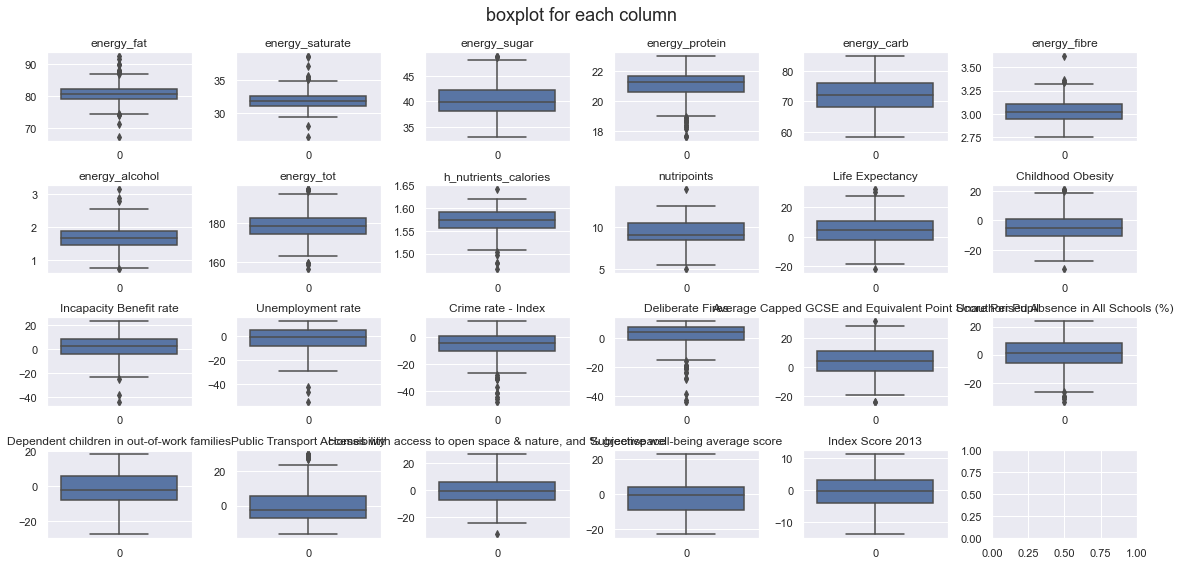

In [26]:
columns_scores = [
    'Life Expectancy',
    'Childhood Obesity',
    'Incapacity Benefit rate',
    'Unemployment rate',
    'Crime rate - Index',
    'Deliberate Fires',
    'Average Capped GCSE and Equivalent Point Score Per Pupil',
    'Unauthorised Absence in All Schools (%)',
    'Dependent children in out-of-work families',
    'Public Transport Accessibility',
    'Homes with access to open space & nature, and % greenspace',
    'Subjective well-being average score',
    'Index Score 2013'
]

columns_grocery = [
    'energy_fat',
    'energy_saturate',
    'energy_sugar',
    'energy_protein',
    'energy_carb',
    'energy_fibre',
    'energy_alcohol',
    'energy_tot',
    'h_nutrients_calories', 
    'nutripoints'
]

column_boxplot = columns_grocery + columns_scores


print(len(column_boxplot))

wellbeing_grocery_analysis = wellbeing_grocery[column_boxplot].copy()
fig, ax = plt.subplots(4, 6, figsize=(16, 8), sharey=False)

for i in range(len(column_boxplot)):
    sbplt = ax[int(i/6), i % 6]

    sns.boxplot(data=wellbeing_grocery_analysis.iloc[:, i], ax=sbplt)
    sbplt.set_xlabel('')
    sbplt.set_ylabel('')
    # TODO: make names of columns shorter to fit plot
    sbplt.set_title(wellbeing_grocery_analysis.columns[i], loc='center', wrap=True)

fig.tight_layout()
fig.subplots_adjust(top=0.9)

fig.suptitle('boxplot for each column', fontsize=18)

We observe that they are some outliers for the different variables. This is due to the differences between the different ward. 

Text(0.5, 0.98, 'boxplot for each column')

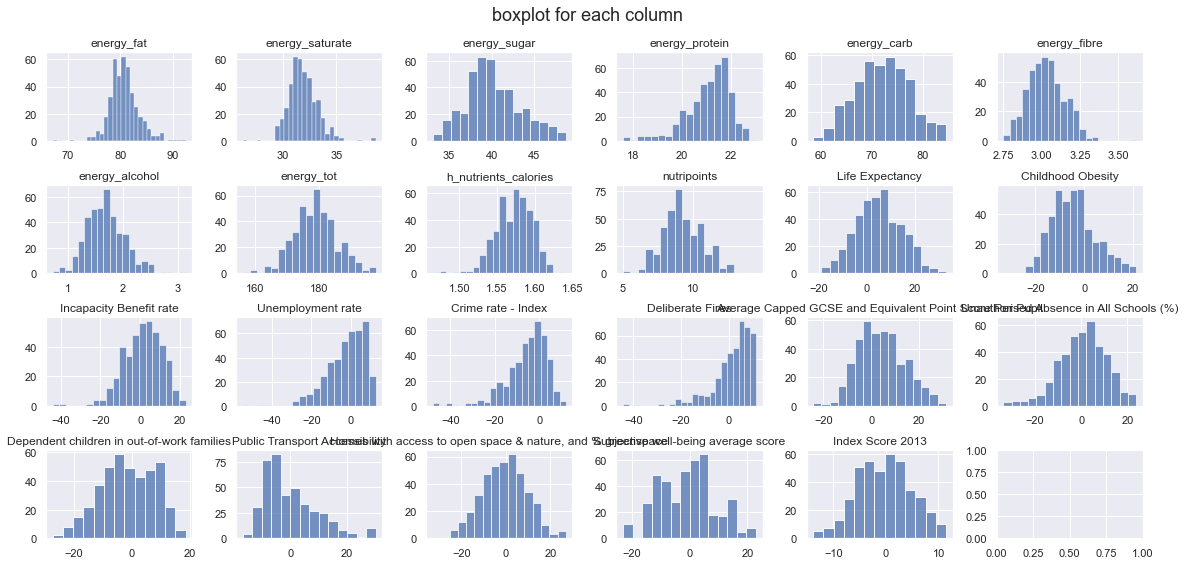

In [27]:
fig, ax = plt.subplots(4, 6, figsize=(16, 8), sharey=False)

for i in range(len(column_boxplot)):
    sbplt = ax[int(i/6), i % 6]

    sns.histplot(data=wellbeing_grocery_analysis.iloc[:, i], ax=sbplt)
    sbplt.set_xlabel('')
    sbplt.set_ylabel('')
    sbplt.set_title(wellbeing_grocery_analysis.columns[i], wrap=True)

fig.tight_layout()
fig.subplots_adjust(top=0.9)

fig.suptitle('boxplot for each column', fontsize=18)

In [28]:
correlation = wellbeing_grocery_analysis.corr(method="spearman")
display(correlation)

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,nutripoints,...,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score,Index Score 2013
energy_fat,1.000000,0.794008,0.518320,-0.051129,0.528766,-0.022809,-0.306844,0.760485,-0.554516,0.484302,...,-0.170388,0.010652,-0.176290,-0.083693,-0.039851,-0.012980,-0.253005,0.212674,0.167257,-0.051765
energy_saturate,0.794008,1.000000,0.420225,-0.172299,0.325855,-0.061581,-0.169905,0.506666,-0.414911,0.590893,...,0.051839,0.176281,0.012804,0.053995,0.140953,0.165477,-0.276443,0.182293,0.008602,0.139416
energy_sugar,0.518320,0.420225,1.000000,-0.517745,0.843177,-0.299513,-0.397929,0.780870,-0.777506,0.436790,...,-0.099329,0.242386,-0.315661,-0.033822,0.069130,0.007639,-0.492036,0.021304,0.051887,-0.080296
energy_protein,-0.051129,-0.172299,-0.517745,1.000000,-0.316860,0.374254,0.302556,-0.145463,0.551938,-0.315371,...,0.077650,-0.142165,0.094958,0.012193,-0.020728,-0.046501,0.119329,0.112256,0.060965,0.041988
energy_carb,0.528766,0.325855,0.843177,-0.316860,1.000000,-0.355920,-0.585464,0.932636,-0.860796,0.232162,...,-0.314781,0.126398,-0.417559,-0.170743,-0.085563,-0.141283,-0.505008,-0.006541,0.041767,-0.271345
energy_fibre,-0.022809,-0.061581,-0.299513,0.374254,-0.355920,1.000000,0.167844,-0.242023,0.413188,-0.453616,...,0.659100,0.279590,0.380703,0.503871,0.518466,0.556797,-0.084597,0.027839,-0.056576,0.620441
energy_alcohol,-0.306844,-0.169905,-0.397929,0.302556,-0.585464,0.167844,1.000000,-0.504350,0.805775,0.083176,...,0.308832,-0.088154,0.223652,0.135398,0.126966,0.162501,0.269470,0.081716,0.003030,0.247782
energy_tot,0.760485,0.506666,0.780870,-0.145463,0.932636,-0.242023,-0.504350,1.000000,-0.787751,0.316234,...,-0.302588,0.080201,-0.384443,-0.161635,-0.089986,-0.124365,-0.471491,0.099475,0.107429,-0.229348
h_nutrients_calories,-0.554516,-0.414911,-0.777506,0.551938,-0.860796,0.413188,0.805775,-0.787751,1.000000,-0.291113,...,0.375696,-0.091720,0.349449,0.190620,0.134059,0.171759,0.391602,0.034879,-0.017220,0.295569
nutripoints,0.484302,0.590893,0.436790,-0.315371,0.232162,-0.453616,0.083176,0.316234,-0.291113,1.000000,...,-0.204867,-0.038874,-0.158829,-0.156403,-0.160991,-0.136101,-0.080805,0.108918,0.045825,-0.145147


energy_fat                                                   -0.022809
energy_saturate                                              -0.061581
energy_sugar                                                 -0.299513
energy_protein                                                0.374254
energy_carb                                                  -0.355920
energy_fibre                                                  1.000000
energy_alcohol                                                0.167844
energy_tot                                                   -0.242023
h_nutrients_calories                                          0.413188
nutripoints                                                  -0.453616
Life Expectancy                                               0.409666
Childhood Obesity                                             0.604526
Incapacity Benefit rate                                       0.445697
Unemployment rate                                             0.659100
Crime 

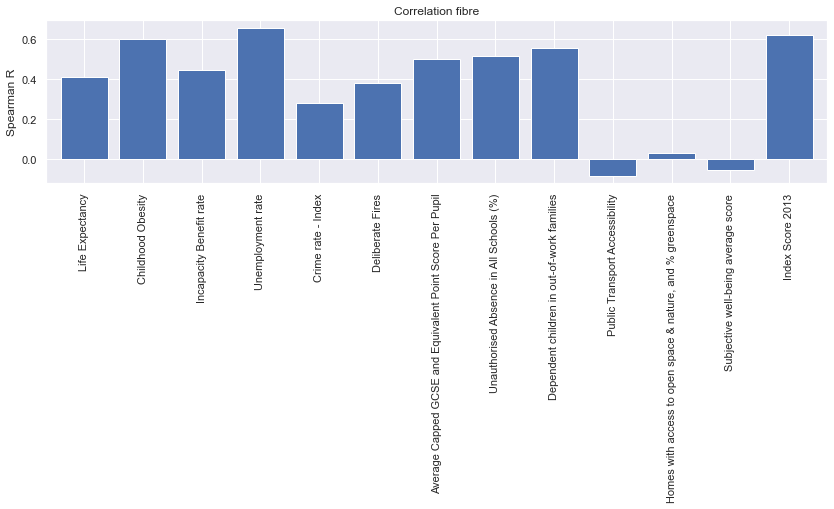

In [29]:
plt.figure(figsize=(14, 3))
display(correlation["energy_fibre"])
correlation["energy_fibre"][columns_scores].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation fibre")
plt.show()

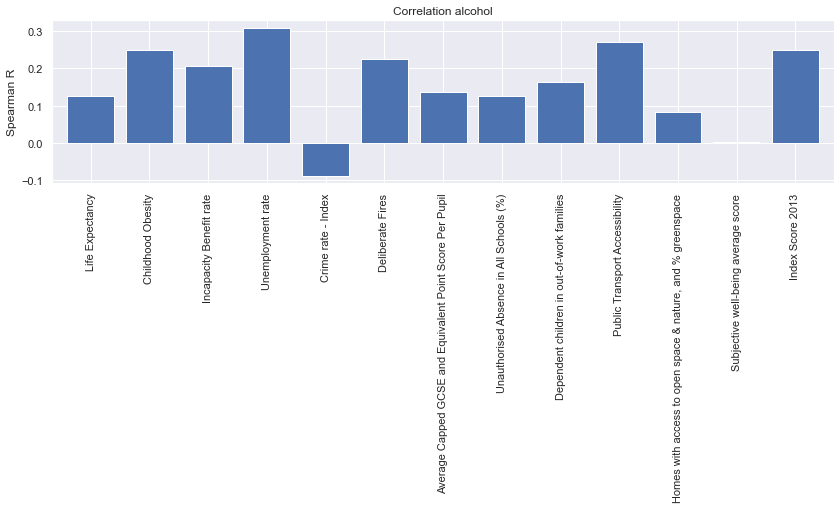

In [30]:
plt.figure(figsize=(14, 3))
correlation["energy_alcohol"][columns_scores].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation alcohol")
plt.show()

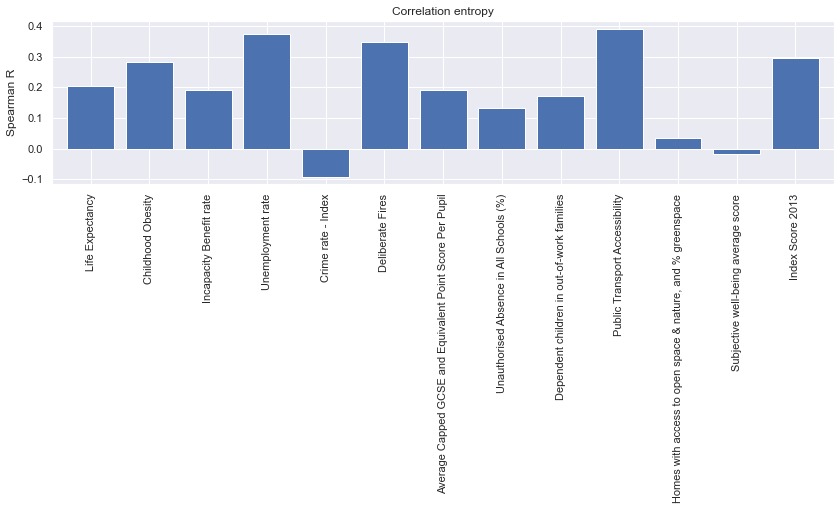

In [31]:
plt.figure(figsize=(14, 3))
correlation["h_nutrients_calories"][columns_scores].plot.bar(
    x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation entropy")
plt.show()

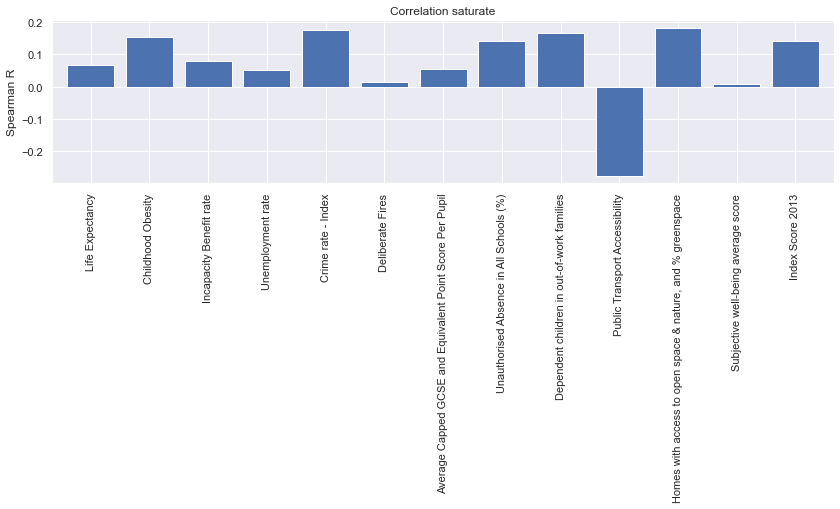

In [32]:
plt.figure(figsize=(14, 3))
correlation["energy_saturate"][columns_scores].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation saturate")
plt.show()

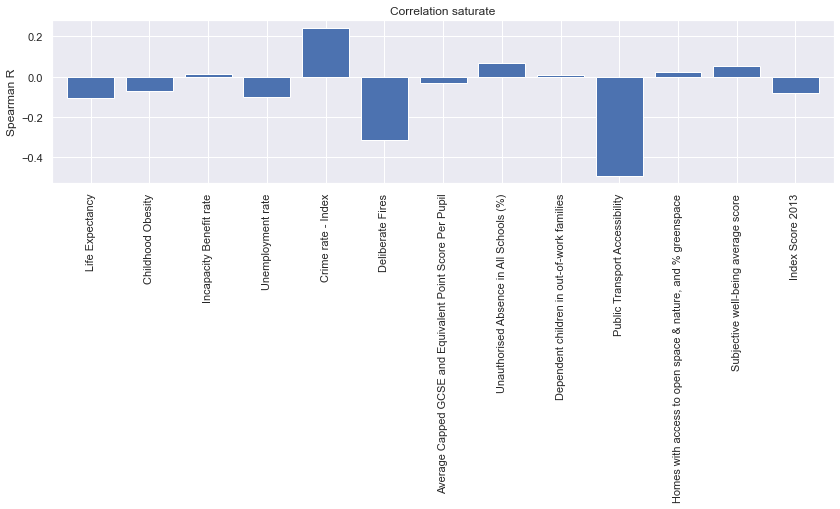

In [33]:
plt.figure(figsize=(14, 3))
correlation["energy_sugar"][columns_scores].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation saturate")
plt.show()

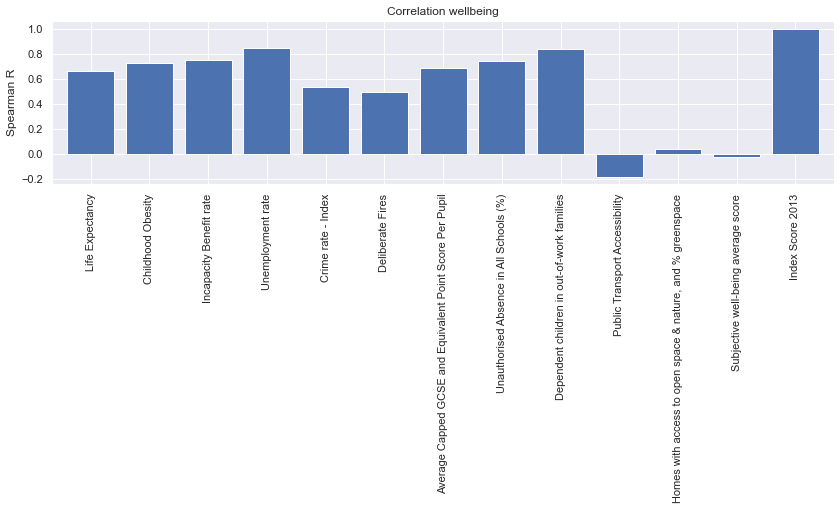

In [34]:
plt.figure(figsize=(14, 3))
correlation["Index Score 2013"][columns_scores].plot.bar(
    x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation wellbeing")
plt.show()

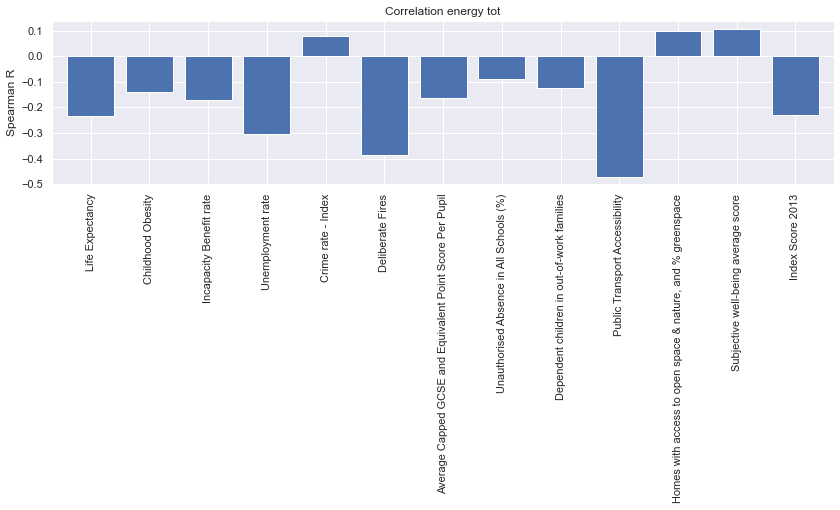

In [35]:
plt.figure(figsize=(14, 3))
correlation["energy_tot"][columns_scores].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation energy tot")
plt.show()

In [36]:
scaler = StandardScaler()
wellbeing_grocery_analysis[wellbeing_grocery_analysis.columns] = scaler.fit_transform(wellbeing_grocery_analysis
                                                                                      [wellbeing_grocery_analysis.columns])
display(wellbeing_grocery_analysis)

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,nutripoints,...,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score,Index Score 2013
0,-0.679382,0.369610,-0.479459,0.407015,-0.171595,-0.295458,0.168761,-0.350916,0.433367,0.517005,...,1.023153,1.229338,0.007957,0.509719,1.332761,0.904735,-1.315813,0.618938,0.107177,1.018536
1,1.346886,1.467823,-1.275920,1.045783,-0.421196,0.314177,0.042586,0.368445,0.132918,-0.209786,...,-0.396844,-1.251413,0.528116,0.145085,0.225019,0.462585,1.271772,-0.374609,0.515005,0.166620
2,-0.082384,-0.198850,-2.045848,1.184058,-2.020281,0.987699,0.021501,-1.412358,1.058000,-0.573182,...,0.492257,1.209089,0.924788,1.509850,-0.009599,0.643294,1.693710,-1.373008,1.088850,0.915195
3,-1.140098,-1.012618,-1.398991,1.429298,-0.954813,-0.365399,0.224150,-1.004049,1.143057,-0.209786,...,-0.880376,-0.885245,0.777871,0.081012,0.649806,-0.967446,1.892325,-1.309051,0.280584,-0.439372
4,0.782644,1.018218,-0.792206,0.299903,-0.117653,-0.683041,-0.883556,0.210241,-0.519870,-0.209786,...,-0.349029,-0.115296,0.099514,-1.013549,-0.183679,0.546545,0.421743,1.042237,0.515005,-0.015195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.594252,-0.125275,2.186724,0.034618,1.930363,0.153834,-0.491631,1.707513,-0.979953,0.153609,...,0.033736,-0.276829,-5.415851,-0.349958,-1.634845,-1.052527,-1.249352,1.777033,-0.243717,-1.340600
410,1.274508,1.145310,1.562810,-0.432161,1.244309,-0.529405,0.048035,1.410470,-0.893200,2.333982,...,0.284149,0.111382,-3.057284,-2.406441,-1.162867,-0.668788,-0.931724,-0.364684,0.398008,-1.363212
411,1.962805,1.868176,0.615476,-0.500691,0.657564,1.229254,-0.939511,1.210682,-1.113100,-0.209786,...,0.485998,0.656566,-0.148584,0.382731,0.142024,-0.084709,-1.101726,0.974793,-0.819523,0.228237
412,1.302194,0.455461,1.562933,0.180921,1.174673,-0.548632,-1.425095,1.373912,-1.299340,0.517005,...,-0.704583,0.755927,-1.896865,0.044704,-0.354263,-0.616657,-1.115243,0.908306,-0.388726,-0.816709


In [37]:
reg_features = 'Q("Life Expectancy") + Q("Incapacity Benefit rate") + Q("Unemployment rate") + Q("Crime rate - Index") \
+ Q("Childhood Obesity") + Q("Homes with access to open space & nature, and % greenspace")'

mod = smf.ols(formula='h_nutrients_calories ~ ' + reg_features, data=wellbeing_grocery_analysis)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     h_nutrients_calories   R-squared:                       0.245
Model:                              OLS   Adj. R-squared:                  0.234
Method:                   Least Squares   F-statistic:                     21.98
Date:                  Sat, 05 Dec 2020   Prob (F-statistic):           2.02e-22
Time:                          14:38:48   Log-Likelihood:                -529.33
No. Observations:                   414   AIC:                             1073.
Df Residuals:                       407   BIC:                             1101.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [38]:
mod = smf.ols(formula='energy_fibre ~ ' + reg_features, data=wellbeing_grocery_analysis)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           energy_fibre   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     52.48
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           9.22e-48
Time:                        14:38:48   Log-Likelihood:                -468.83
No. Observations:                 414   AIC:                             951.7
Df Residuals:                     407   BIC:                             979.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [39]:
wellbeing_scores_columns = wellbeing_scores.columns.values.tolist()
print(wellbeing_scores_columns)

['New ward code', 'Ward name', 'Borough', 'Life Expectancy', 'Childhood Obesity', 'Incapacity Benefit rate', 'Unemployment rate', 'Crime rate - Index', 'Deliberate Fires', 'Average Capped GCSE and Equivalent Point Score Per Pupil', 'Unauthorised Absence in All Schools (%)', 'Dependent children in out-of-work families', 'Public Transport Accessibility', 'Homes with access to open space & nature, and % greenspace', 'Subjective well-being average score', 'Index Score 2013']


In [40]:
numerical_wellbeing_scores_columns = ['Life Expectancy', 'Childhood Obesity', 'Incapacity Benefit rate', 'Unemployment rate',
                                      'Crime rate - Index', 'Deliberate Fires',
                                      'Average Capped GCSE and Equivalent Point Score Per Pupil',
                                      'Unauthorised Absence in All Schools (%)', 'Dependent children in out-of-work families',
                                      'Public Transport Accessibility',
                                      'Homes with access to open space & nature, and % greenspace',
                                      'Subjective well-being average score', 'Index Score 2013']

wellbeing_scores_analysis = wellbeing_scores[numerical_wellbeing_scores_columns].dropna(
).copy()
wellbeing_scores_reduced_pca = PCA(n_components=2).fit(
    wellbeing_scores_analysis).transform(wellbeing_scores_analysis)

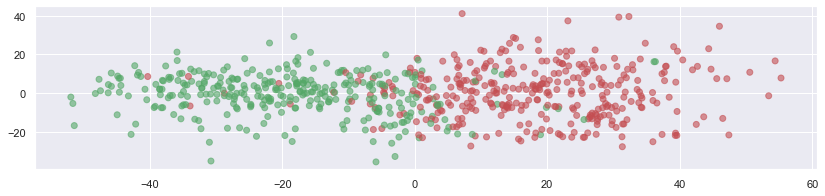

In [41]:
labels = wellbeing_scores_analysis.apply(
    lambda row: "g" if row['Index Score 2013'] >= 0 else "r", axis=1)
# Plot the data reduced in 2d space with PCA
plt.figure(figsize=(14, 3))
plt.scatter(wellbeing_scores_reduced_pca[:, 0],
            wellbeing_scores_reduced_pca[:, 1], c=labels, alpha=0.6)

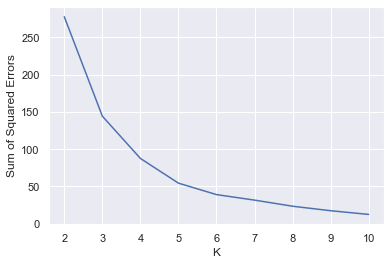

In [42]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np



columns_kmeans_health=['h_nutrients_calories', 'energy_alcohol']
columns_kmeans = ['nutripoints']
wellbeing_grocery_kmeans=wellbeing_grocery[columns_kmeans].copy()

def plot_sse(X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        sse.append({"k": k, "sse": kmeans.inertia_})
    sse = pd.DataFrame(sse)
        # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    
plot_sse(wellbeing_grocery_kmeans)


In [44]:
#######    silhouette scores to choose k    #########
silhouettes = []
for k in range(2, 11): # Try multiple k
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(wellbeing_grocery_kmeans)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
silhouettes = pd.DataFrame(silhouettes) # Convert to dataframe

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

NameError: name 'silhouette_score' is not defined

<AxesSubplot:xlabel='nutripoints'>

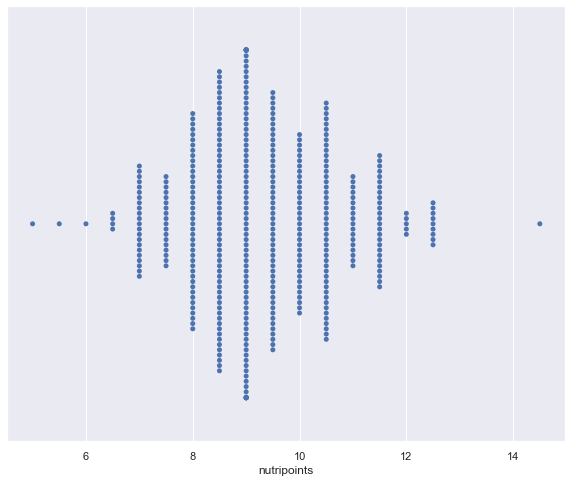

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(10,8), sharey=True, sharex=True)

# Cluster the data with the current number of clusters
kmean = KMeans(n_clusters=5, random_state=42).fit(wellbeing_grocery_kmeans)

# Plot the data by using the labels as color
#axs.scatter(wellbeing_grocery_kmeans, wellbeing_grocery_kmeans, c=kmean.labels_)
wellbeing_grocery_kmeans['label']=kmean.labels_
sns.swarmplot(data=wellbeing_grocery_kmeans, x='nutripoints', ax=axs, hue=wellbeing_grocery_kmeans.label)
# Plot the centroids
#for c in kmean.cluster_centers_:
    #axs.scatter(c[0], c[1], marker="+", color="red")